# **Import Pandas**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# **Read in the Dataset**

In [13]:
salary_df = pd.read_csv('Salary_Data.csv')
salary_df.head()

,Timestamp,How old are you?,Industry,Job title,Additional context on job title,Annual salary,Other monetary comp,Currency,Currency - other,Additional context on income,Country,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


# **Remove all the whitespaces and the commas in the Salary Column so as to convert it to int64**

In [14]:
salary_df['Annual salary'] = salary_df['Annual salary'].str.replace(r'\W' , "")

salary_df

,Timestamp,How old are you?,Industry,Job title,Additional context on job title,Annual salary,Other monetary comp,Currency,Currency - other,Additional context on income,Country,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27592,12/28/2021 18:15:37,45-54,NaN,Associate professor,Tenured,80000,0.0,USD,NaN,"Humanities, regional state college",USA,New Hampshire,Keene,11 - 20 years,11 - 20 years,PhD,Woman,White
27593,12/29/2021 0:42:19,25-34,"Marketing, Advertising & PR",Marketing Manager,NaN,91000,NaN,CAD,NaN,NaN,Canada,NaN,Swift current,5-7 years,5-7 years,Master's degree,Man,White
27594,12/29/2021 6:55:29,25-34,Engineering or Manufacturing,Operational Planner,Compliance and asset management,70000,0.0,USD,NaN,Employed by third-party contract firm with inc...,US,North Dakota,Fargo,5-7 years,1 year or less,College degree,Other or prefer not to answer,White
27595,12/29/2021 16:12:49,25-34,Health care,Office Coordinator,NaN,36500,0.0,USD,NaN,NaN,United States,Mississippi,Jackson,8 - 10 years,2 - 4 years,Some college,Woman,White


# **Remove Columns that don't have relevant data and are not important to the analysis**

In [15]:
salary_df = salary_df.drop(columns=['Additional context on job title', 'Currency - other', 'Other monetary comp', 'Additional context on income'])
salary_df

,Timestamp,How old are you?,Industry,Job title,Annual salary,Currency,Country,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,54600,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,62000,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27592,12/28/2021 18:15:37,45-54,NaN,Associate professor,80000,USD,USA,New Hampshire,Keene,11 - 20 years,11 - 20 years,PhD,Woman,White
27593,12/29/2021 0:42:19,25-34,"Marketing, Advertising & PR",Marketing Manager,91000,CAD,Canada,NaN,Swift current,5-7 years,5-7 years,Master's degree,Man,White
27594,12/29/2021 6:55:29,25-34,Engineering or Manufacturing,Operational Planner,70000,USD,US,North Dakota,Fargo,5-7 years,1 year or less,College degree,Other or prefer not to answer,White
27595,12/29/2021 16:12:49,25-34,Health care,Office Coordinator,36500,USD,United States,Mississippi,Jackson,8 - 10 years,2 - 4 years,Some college,Woman,White


# **Convert the Salary Column datatype to Int64**

In [16]:
salary_df["Annual salary"] = salary_df["Annual salary"].astype('int64')

# **Get all the different types of currency present in the Currency Column**

In [17]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27597 entries, 0 to 27596
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Timestamp                                 27597 non-null  object
 1   How old are you?                          27597 non-null  object
 2   Industry                                  27528 non-null  object
 3   Job title                                 27597 non-null  object
 4   Annual salary                             27597 non-null  int64 
 5   Currency                                  27597 non-null  object
 6   Country                                   27597 non-null  object
 7   State                                     22689 non-null  object
 8   City                                      27522 non-null  object
 9   Overall years of professional experience  27597 non-null  object
 10  Years of experience in field              2759

# **Checking number of NaN values**

In [18]:
salary_df.isnull().sum()

Timestamp                                      0
How old are you?                               0
Industry                                      69
Job title                                      0
Annual salary                                  0
Currency                                       0
Country                                        0
State                                       4908
City                                          75
Overall years of professional experience       0
Years of experience in field                   0
Highest level of education completed         207
Gender                                       164
Race                                         159
dtype: int64

# **I realized i can work on the State Column that has 4988 missing values by matching the City column with the country Column using google to map out the states for the corresponding Cities**

# **I then get rid of all the other rows that have NaN values that can't be replaced**

In [19]:
salary_df.dropna(how = 'any', inplace=True, subset= ['City', 'Industry', 'Highest level of education completed', 'Gender', 'Race'])

In [20]:
salary_df.isnull().sum()

Timestamp                                      0
How old are you?                               0
Industry                                       0
Job title                                      0
Annual salary                                  0
Currency                                       0
Country                                        0
State                                       4762
City                                           0
Overall years of professional experience       0
Years of experience in field                   0
Highest level of education completed           0
Gender                                         0
Race                                           0
dtype: int64

# **Checking to make sure we have the right datatype for the Salary Column**

In [21]:
salary_df['Currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'Other', 'CHF', 'ZAR',
       'SEK', 'HKD', 'JPY'], dtype=object)

# **Use the Currency Column as the index to convert all the other Currency to Dollars**

In [22]:
salary_df.set_index(keys = ["Currency"], inplace = True)


# **Sorting the Currency Index to arrange all the currencies in alphabetical others**

In [23]:
salary_df.sort_index(inplace = True)

salary_df

,Timestamp,How old are you?,Industry,Job title,Annual salary,Country,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
Currency,,,,,,,,,,,,,
AUD/NZD,4/28/2021 4:12:50,45-54,Education (Higher Education),ESOL Teacher,167000,Australia,NaN,Sydney,31 - 40 years,2 - 4 years,Master's degree,Woman,White
AUD/NZD,5/5/2021 22:19:51,25-34,Education (Primary/Secondary),Teacher,74717,Australia,NaN,Melbourne,8 - 10 years,2 - 4 years,Master's degree,Woman,White
AUD/NZD,4/28/2021 5:45:11,45-54,Health care,Executive Assistant,63000,Australia,NaN,Adelaide,21 - 30 years,21 - 30 years,Some college,Woman,White
AUD/NZD,4/29/2021 7:22:57,25-34,"Leisure, Sport & Tourism",Business Development Officer,50000,Australia,NaN,Adelaide,2 - 4 years,2 - 4 years,College degree,Woman,White
AUD/NZD,5/5/2021 22:33:49,18-24,"Marketing, Advertising & PR",Platform Executive,45000,Australia,NaN,Brisbane,2 - 4 years,1 year or less,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZAR,4/27/2021 11:53:46,25-34,Media & Digital,SEO Specialist,543000,South Africa,NaN,Cape Town,8 - 10 years,2 - 4 years,College degree,Woman,Another option not listed here or prefer not t...
ZAR,4/28/2021 17:09:35,35-44,"Accounting, Banking & Finance",Business Analyst,805000,South africa,NaN,Cape town,11 - 20 years,8 - 10 years,College degree,Man,Black or African American
ZAR,4/27/2021 14:36:47,35-44,Education (Higher Education),Associate Professor,974400,South Africa,NaN,Cape Town,21 - 30 years,11 - 20 years,"Professional degree (MD, JD, etc.)",Woman,Asian or Asian American


# **Start converting all the other currencies in the Annual Salary to Dollars**

In [24]:
salary_df.loc[("AUD/NZD"), "Annual salary"] = salary_df.loc[("AUD/NZD"), "Annual salary"].mul(0.9)

In [25]:
salary_df.loc[("GBP"), "Annual salary"] = salary_df.loc[("GBP"), "Annual salary"].mul(1.35)

In [26]:
salary_df.loc[("CAD"), "Annual salary"] = salary_df.loc[("CAD"), "Annual salary"].mul(0.79)

In [27]:
salary_df.loc[("EUR"), "Annual salary"] = salary_df.loc[("EUR"), "Annual salary"].mul(1.13)

In [28]:
salary_df.loc[("CHF"), "Annual salary"] = salary_df.loc[("CHF"), "Annual salary"].mul(1.09)

In [29]:
salary_df.loc[("ZAR"), "Annual salary"] = salary_df.loc[("ZAR"), "Annual salary"].mul(0.065)

In [30]:
salary_df.loc[("SEK"), "Annual salary"] = salary_df.loc[("SEK"), "Annual salary"].mul(0.11)

In [31]:
salary_df.loc[("HKD"), "Annual salary"] = salary_df.loc[("HKD"), "Annual salary"].mul(0.13)

In [32]:
salary_df.loc[("JPY"), "Annual salary"] = salary_df.loc[("JPY"), "Annual salary"].mul(0.0088)

# **There are some other inputs that dosen't have their currency assigned, So i will have to look into the Country column to get their corresponding currencies and convert to Dollars**

In [33]:
salary_df.loc[("Other"), "Country"].unique()

array(['India', 'Argentina', 'Denmark', 'U.S.A.', 'South Korea',
       'Saudi Arabia', 'Czech republic',
       "I work for an US based company but I'm from Argentina.",
       'Malaysia', 'Thailand', 'Czechia', 'czech republic', 'Singapore',
       'USA', 'US', 'Taiwan', 'Norway', 'Poland', 'Israel', 'China',
       'USA ', 'Singapore ', 'Denmark ', 'Philippines', 'Indonesia',
       'Czech Republic ', 'Brazil ', 'denmark', 'Australia', 'Brazil',
       'Mainland China', 'Ireland', 'Mexico', 'Trinidad and Tobago',
       'Czech Republic', 'Brasil', 'Australia ', 'New Zealand', 'croatia',
       'Hungary', 'ARGENTINA BUT MY ORG IS IN THAILAND', 'Switzerland',
       'United States', 'Sri Lanka', 'Norway ', 'UK', 'Canada',
       'South Africa', 'Turkey', 'México', 'Scotland', 'Sweden '],
      dtype=object)

# **To do that, i will have to reset the column back to numeric**

In [34]:
salary_df.reset_index(inplace = True)
salary_df

,Currency,Timestamp,How old are you?,Industry,Job title,Annual salary,Country,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
0,AUD/NZD,4/28/2021 4:12:50,45-54,Education (Higher Education),ESOL Teacher,150300.0,Australia,NaN,Sydney,31 - 40 years,2 - 4 years,Master's degree,Woman,White
1,AUD/NZD,5/5/2021 22:19:51,25-34,Education (Primary/Secondary),Teacher,67245.3,Australia,NaN,Melbourne,8 - 10 years,2 - 4 years,Master's degree,Woman,White
2,AUD/NZD,4/28/2021 5:45:11,45-54,Health care,Executive Assistant,56700.0,Australia,NaN,Adelaide,21 - 30 years,21 - 30 years,Some college,Woman,White
3,AUD/NZD,4/29/2021 7:22:57,25-34,"Leisure, Sport & Tourism",Business Development Officer,45000.0,Australia,NaN,Adelaide,2 - 4 years,2 - 4 years,College degree,Woman,White
4,AUD/NZD,5/5/2021 22:33:49,18-24,"Marketing, Advertising & PR",Platform Executive,40500.0,Australia,NaN,Brisbane,2 - 4 years,1 year or less,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27020,ZAR,4/27/2021 11:53:46,25-34,Media & Digital,SEO Specialist,35295.0,South Africa,NaN,Cape Town,8 - 10 years,2 - 4 years,College degree,Woman,Another option not listed here or prefer not t...
27021,ZAR,4/28/2021 17:09:35,35-44,"Accounting, Banking & Finance",Business Analyst,52325.0,South africa,NaN,Cape town,11 - 20 years,8 - 10 years,College degree,Man,Black or African American
27022,ZAR,4/27/2021 14:36:47,35-44,Education (Higher Education),Associate Professor,63336.0,South Africa,NaN,Cape Town,21 - 30 years,11 - 20 years,"Professional degree (MD, JD, etc.)",Woman,Asian or Asian American
27023,ZAR,4/29/2021 14:39:01,45-54,Engineering or Manufacturing,Account Manager,26000.0,South Africa,NaN,Pietermaritzburg,11 - 20 years,2 - 4 years,College degree,Woman,White


# **Then set the Currency and the Country column as the new index**

In [35]:
salary_df.set_index(keys = ["Currency", "Country"], inplace = True)

In [36]:
salary_df

Timestamp  ...                                               Race
Currency Country                            ...                                                   
AUD/NZD  Australia       4/28/2021 4:12:50  ...                                              White
         Australia       5/5/2021 22:19:51  ...                                              White
         Australia       4/28/2021 5:45:11  ...                                              White
         Australia       4/29/2021 7:22:57  ...                                              White
         Australia       5/5/2021 22:33:49  ...                                              White
...                                    ...  ...                                                ...
ZAR      South Africa   4/27/2021 11:53:46  ...  Another option not listed here or prefer not t...
         South africa   4/28/2021 17:09:35  ...                          Black or African American
         South Africa   4/27/2021 14:36:47  ...                            Asian or Asian American
         South Africa   4/29/2021 14:39:01  ...                                              White
         South Africa   4/27/2021 12:05:46  ...                                              White

[27025 rows x 12 columns]

# **Check all the Salaries that has no value and are set as other**

In [37]:
salary_df.loc[("Other"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


Country
India           1200000.0
Argentina        780000.0
Denmark          556200.0
India           1465000.0
U.S.A.            76500.0
                  ...    
USA               64000.0
Sweden           318000.0
South Korea    43800000.0
Malaysia          38760.0
Denmark          510000.0
Name: Annual salary, Length: 138, dtype: float64

In [38]:
salary_df.loc[("Other", "Taiwan"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Taiwan      732000.0
          Taiwan     1000000.0
Name: Annual salary, dtype: float64

# **Now use the country column to get the right currency for the Annual Salaries that dosn't have an input in the currency column**

In [39]:
salary_df.loc[("Other", "Taiwan"), "Annual salary"] = salary_df.loc[("Other", "Taiwan"), "Annual salary"].mul(0.036)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [40]:
salary_df.loc[("Other", "Taiwan"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Taiwan     26352.0
          Taiwan     36000.0
Name: Annual salary, dtype: float64

In [41]:
salary_df.loc[("Other", "India"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     India      1200000.0
          India      1465000.0
          India      2800000.0
          India       500000.0
          India       750000.0
          India      2100000.0
          India       885000.0
          India       945000.0
          India      4000000.0
Name: Annual salary, dtype: float64

In [42]:
salary_df.loc[("Other", "India"), "Annual salary"] = salary_df.loc[("Other", "India"), "Annual salary"].mul(0.013)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [43]:
salary_df.loc[("Other", "India"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     India      15600.0
          India      19045.0
          India      36400.0
          India       6500.0
          India       9750.0
          India      27300.0
          India      11505.0
          India      12285.0
          India      52000.0
Name: Annual salary, dtype: float64

In [44]:
salary_df.loc[("Other", "South Korea"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country    
Other     South Korea    27000000.0
          South Korea    38000000.0
          South Korea    36000000.0
          South Korea    43800000.0
Name: Annual salary, dtype: float64

In [45]:
salary_df.loc[("Other", "South Korea"), "Annual salary"] = salary_df.loc[("Other", "South Korea"), "Annual salary"].mul(0.00083)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [46]:
salary_df.loc[("Other", "South Korea"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country    
Other     South Korea    22410.0
          South Korea    31540.0
          South Korea    29880.0
          South Korea    36354.0
Name: Annual salary, dtype: float64

In [47]:
salary_df.loc[("Other", "New Zealand"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country    
Other     New Zealand    65000.0
          New Zealand    86000.0
Name: Annual salary, dtype: float64

In [48]:
salary_df.loc[("Other", "New Zealand"), "Annual salary"] = salary_df.loc[("Other", "New Zealand"), "Annual salary"].mul(0.67)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [49]:
salary_df.loc[("Other", "New Zealand"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country    
Other     New Zealand    43550.0
          New Zealand    57620.0
Name: Annual salary, dtype: float64

In [50]:
salary_df.loc[("Other", "Poland"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Poland      72000.0
          Poland     180000.0
          Poland      60000.0
          Poland      66500.0
          Poland     145000.0
          Poland      37200.0
Name: Annual salary, dtype: float64

In [51]:
salary_df.loc[("Other", "Poland"), "Annual salary"] = salary_df.loc[("Other", "Poland"), "Annual salary"].mul(0.25)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [52]:
salary_df.loc[("Other", "Poland"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Poland     18000.0
          Poland     45000.0
          Poland     15000.0
          Poland     16625.0
          Poland     36250.0
          Poland      9300.0
Name: Annual salary, dtype: float64

In [53]:
salary_df.loc[("Other", "China"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     China      260000.0
          China      390000.0
          China      250000.0
Name: Annual salary, dtype: float64

In [54]:
salary_df.loc[("Other", "China"), "Annual salary"] = salary_df.loc[("Other", "China"), "Annual salary"].mul(0.16)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [55]:
salary_df.loc[("Other", "China"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     China      41600.0
          China      62400.0
          China      40000.0
Name: Annual salary, dtype: float64

In [56]:
salary_df.loc[("Other", "Singapore "), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country   
Other     Singapore     135000.0
          Singapore      92580.0
Name: Annual salary, dtype: float64

In [57]:
salary_df.loc[("Other", "Singapore "), "Annual salary"] = salary_df.loc[("Other", "Singapore "), "Annual salary"].mul(0.74)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [58]:
salary_df.loc[("Other", "Singapore "), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country   
Other     Singapore     99900.0
          Singapore     68509.2
Name: Annual salary, dtype: float64

In [59]:
salary_df.loc[("Other", "I work for an US based company but I'm from Argentina."), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country                                               
Other     I work for an US based company but I'm from Argentina.    240000.0
Name: Annual salary, dtype: float64

In [60]:
salary_df.loc[("Other", "I work for an US based company but I'm from Argentina."), "Annual salary"] = salary_df.loc[("Other", "I work for an US based company but I'm from Argentina."), "Annual salary"].mul(0.0096)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [61]:
salary_df.loc[("Other", "I work for an US based company but I'm from Argentina."), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country                                               
Other     I work for an US based company but I'm from Argentina.    2304.0
Name: Annual salary, dtype: float64

In [62]:
salary_df.loc[("Other", "Norway"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Norway      955000.0
          Norway      700000.0
          Norway      660000.0
          Norway      813000.0
          Norway     1150000.0
          Norway      950000.0
          Norway      669500.0
          Norway      800000.0
          Norway      586500.0
Name: Annual salary, dtype: float64

In [63]:
salary_df.loc[("Other", "Norway"), "Annual salary"] = salary_df.loc[("Other", "Norway"), "Annual salary"].mul(0.11)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [64]:
salary_df.loc[("Other", "Norway"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Norway     105050.0
          Norway      77000.0
          Norway      72600.0
          Norway      89430.0
          Norway     126500.0
          Norway     104500.0
          Norway      73645.0
          Norway      88000.0
          Norway      64515.0
Name: Annual salary, dtype: float64

In [65]:
salary_df.loc[("Other", "Singapore"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country  
Other     Singapore     80000.0
          Singapore    186000.0
          Singapore     46980.0
          Singapore     44200.0
          Singapore     37800.0
          Singapore    126000.0
Name: Annual salary, dtype: float64

In [66]:
salary_df.loc[("Other", "Singapore"), "Annual salary"] = salary_df.loc[("Other", "Singapore"), "Annual salary"].mul(0.74)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [67]:
salary_df.loc[("Other", "Singapore"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country  
Other     Singapore     59200.0
          Singapore    137640.0
          Singapore     34765.2
          Singapore     32708.0
          Singapore     27972.0
          Singapore     93240.0
Name: Annual salary, dtype: float64

In [68]:
salary_df.loc[("Other", "Argentina"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country  
Other     Argentina     780000.0
          Argentina    1080000.0
          Argentina     845000.0
          Argentina    1500000.0
Name: Annual salary, dtype: float64

In [69]:
salary_df.loc[("Other", "Argentina"), "Annual salary"] = salary_df.loc[("Other", "Argentina"), "Annual salary"].mul(0.0096)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [70]:
salary_df.loc[("Other", "Argentina"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country  
Other     Argentina     7488.0
          Argentina    10368.0
          Argentina     8112.0
          Argentina    14400.0
Name: Annual salary, dtype: float64

In [71]:
salary_df.loc[("Other", "Malaysia"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country 
Other     Malaysia     50000.0
          Malaysia    288000.0
          Malaysia     48000.0
          Malaysia    100000.0
          Malaysia     97000.0
          Malaysia     36000.0
          Malaysia     40000.0
          Malaysia    130000.0
          Malaysia     42000.0
          Malaysia     80640.0
          Malaysia     38760.0
Name: Annual salary, dtype: float64

In [72]:
salary_df.loc[("Other", "Malaysia"), "Annual salary"] = salary_df.loc[("Other", "Malaysia"), "Annual salary"].mul(0.24)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [73]:
salary_df.loc[("Other", "Malaysia"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country 
Other     Malaysia    12000.0
          Malaysia    69120.0
          Malaysia    11520.0
          Malaysia    24000.0
          Malaysia    23280.0
          Malaysia     8640.0
          Malaysia     9600.0
          Malaysia    31200.0
          Malaysia    10080.0
          Malaysia    19353.6
          Malaysia     9302.4
Name: Annual salary, dtype: float64

In [74]:
salary_df.loc[("Other", "México"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     México     504000.0
Name: Annual salary, dtype: float64

In [75]:
salary_df.loc[("Other", "México"), "Annual salary"] = salary_df.loc[("Other", "México"), "Annual salary"].mul(0.048)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [76]:
salary_df.loc[("Other", "México"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     México     24192.0
Name: Annual salary, dtype: float64

In [77]:
salary_df.loc[("Other", "Brazil"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Brazil     102000.0
          Brazil      30238.0
          Brazil     221000.0
          Brazil     226800.0
          Brazil     156000.0
          Brazil     253000.0
Name: Annual salary, dtype: float64

In [78]:
salary_df.loc[("Other", "Brazil"), "Annual salary"] = salary_df.loc[("Other", "Brazil"), "Annual salary"].mul(0.18)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [79]:
salary_df.loc[("Other", "Brazil"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Brazil     18360.00
          Brazil      5442.84
          Brazil     39780.00
          Brazil     40824.00
          Brazil     28080.00
          Brazil     45540.00
Name: Annual salary, dtype: float64

In [80]:
salary_df.loc[("Other", "Denmark"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Denmark     556200.0
          Denmark     700000.0
          Denmark    1400000.0
          Denmark     550000.0
          Denmark     600000.0
          Denmark     325000.0
          Denmark     428000.0
          Denmark     510000.0
Name: Annual salary, dtype: float64

In [81]:
salary_df.loc[("Other", "Denmark"), "Annual salary"] = salary_df.loc[("Other", "Denmark"), "Annual salary"].mul(0.15)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [82]:
salary_df.loc[("Other", "Denmark"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Denmark     83430.0
          Denmark    105000.0
          Denmark    210000.0
          Denmark     82500.0
          Denmark     90000.0
          Denmark     48750.0
          Denmark     64200.0
          Denmark     76500.0
Name: Annual salary, dtype: float64

In [83]:
salary_df.loc[("Other", "Denmark "), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country 
Other     Denmark     829500.0
          Denmark     288000.0
Name: Annual salary, dtype: float64

In [84]:
salary_df.loc[("Other", "Denmark "), "Annual salary"] = salary_df.loc[("Other", "Denmark "), "Annual salary"].mul(0.15)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [85]:
salary_df.loc[("Other", "Denmark "), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country 
Other     Denmark     124425.0
          Denmark      43200.0
Name: Annual salary, dtype: float64

In [86]:
salary_df.loc[("Other", "Switzerland"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country    
Other     Switzerland    60000.0
Name: Annual salary, dtype: float64

In [87]:
salary_df.loc[("Other", "Switzerland"), "Annual salary"] = salary_df.loc[("Other", "Switzerland"), "Annual salary"].mul(1.09)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [88]:
salary_df.loc[("Other", "Switzerland"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country    
Other     Switzerland    65400.0
Name: Annual salary, dtype: float64

In [89]:
salary_df.loc[("Other", "Australia "), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country   
Other     Australia     83000.0
          Australia     91800.0
Name: Annual salary, dtype: float64

In [90]:
salary_df.loc[("Other", "Australia "), "Annual salary"] = salary_df.loc[("Other", "Australia "), "Annual salary"].mul(0.71)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [91]:
salary_df.loc[("Other", "Australia "), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country   
Other     Australia     58930.0
          Australia     65178.0
Name: Annual salary, dtype: float64

In [92]:
salary_df.loc[("Other", "denmark"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     denmark    760000.0
Name: Annual salary, dtype: float64

In [93]:
salary_df.loc[("Other", "denmark"), "Annual salary"] = salary_df.loc[("Other", "denmark"), "Annual salary"].mul(0.15)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [94]:
salary_df.loc[("Other", "denmark"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     denmark    114000.0
Name: Annual salary, dtype: float64

In [95]:
salary_df.loc[("Other", "Czechia"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Czechia    1200000.0
Name: Annual salary, dtype: float64

In [96]:
salary_df.loc[("Other", "Czechia"), "Annual salary"] = salary_df.loc[("Other", "Czechia"), "Annual salary"].mul(0.046)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [97]:
salary_df.loc[("Other", "Czechia"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Czechia    55200.0
Name: Annual salary, dtype: float64

In [98]:
salary_df.loc[("Other", "Philippines"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country    
Other     Philippines     600000.0
          Philippines     402000.0
          Philippines        264.0
          Philippines     360000.0
          Philippines     300000.0
          Philippines    1100000.0
Name: Annual salary, dtype: float64

In [99]:
salary_df.loc[("Other", "Philippines"), "Annual salary"] = salary_df.loc[("Other", "Philippines"), "Annual salary"].mul(0.020)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [100]:
salary_df.loc[("Other", "Philippines"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country    
Other     Philippines    12000.00
          Philippines     8040.00
          Philippines        5.28
          Philippines     7200.00
          Philippines     6000.00
          Philippines    22000.00
Name: Annual salary, dtype: float64

In [101]:
salary_df.loc[("Other", "Mexico"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Mexico      230000.0
          Mexico     1300000.0
          Mexico      534300.0
Name: Annual salary, dtype: float64

In [102]:
salary_df.loc[("Other", "Mexico"), "Annual salary"] = salary_df.loc[("Other", "Mexico"), "Annual salary"].mul(0.048)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [103]:
salary_df.loc[("Other", "Mexico"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Mexico     11040.0
          Mexico     62400.0
          Mexico     25646.4
Name: Annual salary, dtype: float64

In [104]:
salary_df.loc[("Other", "Sweden "), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Sweden     318000.0
Name: Annual salary, dtype: float64

In [105]:
salary_df.loc[("Other", "Sweden "), "Annual salary"] = salary_df.loc[("Other", "Sweden "), "Annual salary"].mul(0.11)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [106]:
salary_df.loc[("Other", "Sweden "), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Sweden     34980.0
Name: Annual salary, dtype: float64

In [107]:
salary_df.loc[("Other", "Norway "), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Norway     1115000.0
Name: Annual salary, dtype: float64

In [108]:
salary_df.loc[("Other", "Norway "), "Annual salary"] = salary_df.loc[("Other", "Norway "), "Annual salary"].mul(0.11)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [109]:
salary_df.loc[("Other", "Norway "), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Norway     122650.0
Name: Annual salary, dtype: float64

In [110]:
salary_df.loc[("Other", "Saudi Arabia"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country     
Other     Saudi Arabia    163200.0
Name: Annual salary, dtype: float64

In [111]:
salary_df.loc[("Other", "Saudi Arabia"), "Annual salary"] = salary_df.loc[("Other", "Saudi Arabia"), "Annual salary"].mul(0.27)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [112]:
salary_df.loc[("Other", "Saudi Arabia"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country     
Other     Saudi Arabia    44064.0
Name: Annual salary, dtype: float64

In [113]:
salary_df.loc[("Other", "Brazil "), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Brazil     102.0
Name: Annual salary, dtype: float64

In [114]:
salary_df.loc[("Other", "Brazil "), "Annual salary"] = salary_df.loc[("Other", "Brazil "), "Annual salary"].mul(0.18)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [115]:
salary_df.loc[("Other", "Brazil "), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Brazil     18.36
Name: Annual salary, dtype: float64

In [116]:
salary_df.loc[("Other", "Thailand"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country 
Other     Thailand    720000.0
          Thailand    800000.0
Name: Annual salary, dtype: float64

In [117]:
salary_df.loc[("Other", "Thailand"), "Annual salary"] = salary_df.loc[("Other", "Thailand"), "Annual salary"].mul(0.030)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [118]:
salary_df.loc[("Other", "Thailand"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country 
Other     Thailand    21600.0
          Thailand    24000.0
Name: Annual salary, dtype: float64

In [119]:
salary_df.loc[("Other", "Hungary"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Hungary    45480.0
Name: Annual salary, dtype: float64

In [120]:
salary_df.loc[("Other", "Hungary"), "Annual salary"] = salary_df.loc[("Other", "Hungary"), "Annual salary"].mul(0.0031)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [121]:
salary_df.loc[("Other", "Hungary"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Hungary    140.988
Name: Annual salary, dtype: float64

In [122]:
salary_df.loc[("Other", "czech republic"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country       
Other     czech republic    360000.0
Name: Annual salary, dtype: float64

In [123]:
salary_df.loc[("Other", "czech republic"), "Annual salary"] = salary_df.loc[("Other", "czech republic"), "Annual salary"].mul(0.046)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [124]:
salary_df.loc[("Other", "czech republic"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country       
Other     czech republic    16560.0
Name: Annual salary, dtype: float64

In [125]:
salary_df.loc[("Other", "Israel"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Israel     276000.0
          Israel     240000.0
          Israel     504000.0
          Israel     180000.0
          Israel     210000.0
          Israel     580000.0
Name: Annual salary, dtype: float64

In [126]:
salary_df.loc[("Other", "Israel"), "Annual salary"] = salary_df.loc[("Other", "Israel"), "Annual salary"].mul(0.31)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [127]:
salary_df.loc[("Other", "Israel"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Israel      85560.0
          Israel      74400.0
          Israel     156240.0
          Israel      55800.0
          Israel      65100.0
          Israel     179800.0
Name: Annual salary, dtype: float64

In [128]:
salary_df.loc[("Other", "China"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     China      41600.0
          China      62400.0
          China      40000.0
Name: Annual salary, dtype: float64

In [129]:
salary_df.loc[("Other", "China"), "Annual salary"] = salary_df.loc[("Other", "China"), "Annual salary"].mul(0.16)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [130]:
salary_df.loc[("Other", "China"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     China      6656.0
          China      9984.0
          China      6400.0
Name: Annual salary, dtype: float64

In [131]:
salary_df.loc[("Other", "ARGENTINA BUT MY ORG IS IN THAILAND"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country                            
Other     ARGENTINA BUT MY ORG IS IN THAILAND    804000.0
Name: Annual salary, dtype: float64

In [132]:
salary_df.loc[("Other", "ARGENTINA BUT MY ORG IS IN THAILAND"), "Annual salary"] = salary_df.loc[("Other", "ARGENTINA BUT MY ORG IS IN THAILAND"), "Annual salary"].mul(0.0096)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [133]:
salary_df.loc[("Other", "ARGENTINA BUT MY ORG IS IN THAILAND"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country                            
Other     ARGENTINA BUT MY ORG IS IN THAILAND    7718.4
Name: Annual salary, dtype: float64

In [134]:
salary_df.loc[("Other", "UK"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     UK         28000.0
Name: Annual salary, dtype: float64

In [135]:
salary_df.loc[("Other", "UK"), "Annual salary"] = salary_df.loc[("Other", "UK"), "Annual salary"].mul(1.35)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [136]:
salary_df.loc[("Other", "UK"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     UK         37800.0
Name: Annual salary, dtype: float64

In [137]:
salary_df.loc[("Other", "Czech Republic "), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country        
Other     Czech Republic     525000.0
Name: Annual salary, dtype: float64

In [138]:
salary_df.loc[("Other", "Czech Republic "), "Annual salary"] = salary_df.loc[("Other", "Czech Republic "), "Annual salary"].mul(0.046)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [139]:
salary_df.loc[("Other", "Czech Republic "), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country        
Other     Czech Republic     24150.0
Name: Annual salary, dtype: float64

In [140]:
salary_df.loc[("Other", "Czech Republic"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country       
Other     Czech Republic    1300000.0
          Czech Republic     233160.0
Name: Annual salary, dtype: float64

In [141]:
salary_df.loc[("Other", "Czech Republic"), "Annual salary"] = salary_df.loc[("Other", "Czech Republic"), "Annual salary"].mul(0.046)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [142]:
salary_df.loc[("Other", "Czech Republic"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country       
Other     Czech Republic    59800.00
          Czech Republic    10725.36
Name: Annual salary, dtype: float64

In [143]:
salary_df.loc[("Other", "croatia"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     croatia    50000.0
Name: Annual salary, dtype: float64

In [144]:
salary_df.loc[("Other", "croatia"), "Annual salary"] = salary_df.loc[("Other", "croatia"), "Annual salary"].mul(0.15)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [145]:
salary_df.loc[("Other", "croatia"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     croatia    7500.0
Name: Annual salary, dtype: float64

In [146]:
salary_df.loc[("Other", "Indonesia"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country  
Other     Indonesia    870000000.0
          Indonesia    180000000.0
Name: Annual salary, dtype: float64

In [147]:
salary_df.loc[("Other", "Indonesia"), "Annual salary"] = salary_df.loc[("Other", "Indonesia"), "Annual salary"].mul(0.000070)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [148]:
salary_df.loc[("Other", "Indonesia"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country  
Other     Indonesia    60900.0
          Indonesia    12600.0
Name: Annual salary, dtype: float64

In [149]:
salary_df.loc[("Other", "Ireland"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Ireland    59100.0
Name: Annual salary, dtype: float64

In [150]:
salary_df.loc[("Other", "Ireland"), "Annual salary"] = salary_df.loc[("Other", "Ireland"), "Annual salary"].mul(1.13)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [151]:
salary_df.loc[("Other", "Ireland"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Ireland    66783.0
Name: Annual salary, dtype: float64

In [152]:
salary_df.loc[("Other", "Trinidad and Tobago"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country            
Other     Trinidad and Tobago    62400.0
Name: Annual salary, dtype: float64

In [153]:
salary_df.loc[("Other", "Trinidad and Tobago"), "Annual salary"] = salary_df.loc[("Other", "Trinidad and Tobago"), "Annual salary"].mul(0.15)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [154]:
salary_df.loc[("Other", "Trinidad and Tobago"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country            
Other     Trinidad and Tobago    9360.0
Name: Annual salary, dtype: float64

In [155]:
salary_df.loc[("Other", "Turkey"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Turkey     72.0
Name: Annual salary, dtype: float64

In [156]:
salary_df.loc[("Other", "Turkey"), "Annual salary"] = salary_df.loc[("Other", "Turkey"), "Annual salary"].mul(0.074)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [157]:
salary_df.loc[("Other", "Turkey"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Turkey     5.328
Name: Annual salary, dtype: float64

In [158]:
salary_df.loc[("Other", "Australia"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country  
Other     Australia     80000.0
          Australia     52000.0
          Australia    730000.0
Name: Annual salary, dtype: float64

In [159]:
salary_df.loc[("Other", "Australia"), "Annual salary"] = salary_df.loc[("Other", "Australia"), "Annual salary"].mul(0.71)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [160]:
salary_df.loc[("Other", "Australia"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country  
Other     Australia     56800.0
          Australia     36920.0
          Australia    518300.0
Name: Annual salary, dtype: float64

In [161]:
salary_df.loc[("Other", "Brasil"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Brasil     182000.0
Name: Annual salary, dtype: float64

In [162]:
salary_df.loc[("Other", "Brasil"), "Annual salary"] = salary_df.loc[("Other", "Brasil"), "Annual salary"].mul(0.18)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [163]:
salary_df.loc[("Other", "Brasil"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Brasil     32760.0
Name: Annual salary, dtype: float64

In [164]:
salary_df.loc[("Other", "South Africa"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country     
Other     South Africa    288000.0
Name: Annual salary, dtype: float64

In [165]:
salary_df.loc[("Other", "South Africa"), "Annual salary"] = salary_df.loc[("Other", "South Africa"), "Annual salary"].mul(0.065)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [166]:
salary_df.loc[("Other", "South Africa"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country     
Other     South Africa    18720.0
Name: Annual salary, dtype: float64

In [167]:
salary_df.loc[("Other", "Canada"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Canada     110000.0
Name: Annual salary, dtype: float64

In [168]:
salary_df.loc[("Other", "Canada"), "Annual salary"] = salary_df.loc[("Other", "Canada"), "Annual salary"].mul(0.79)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [169]:
salary_df.loc[("Other", "Canada"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country
Other     Canada     86900.0
Name: Annual salary, dtype: float64

In [170]:
salary_df.loc[("Other", "Scotland"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country 
Other     Scotland    41000.0
Name: Annual salary, dtype: float64

In [171]:
salary_df.loc[("Other", "Scotland"), "Annual salary"] = salary_df.loc[("Other", "Scotland"), "Annual salary"].mul(1.35)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [172]:
salary_df.loc[("Other", "Scotland"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country 
Other     Scotland    55350.0
Name: Annual salary, dtype: float64

In [173]:
salary_df.loc[("Other", "Sri Lanka"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country  
Other     Sri Lanka    2500000.0
Name: Annual salary, dtype: float64

In [174]:
salary_df.loc[("Other", "Sri Lanka"), "Annual salary"] = salary_df.loc[("Other", "Sri Lanka"), "Annual salary"].mul(0.0049)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [175]:
salary_df.loc[("Other", "Sri Lanka"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country  
Other     Sri Lanka    12250.0
Name: Annual salary, dtype: float64

In [176]:
salary_df.loc[("Other", "Czech republic"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country       
Other     Czech republic    1100000.0
Name: Annual salary, dtype: float64

In [177]:
salary_df.loc[("Other", "Czech republic"), "Annual salary"] = salary_df.loc[("Other", "Czech republic"), "Annual salary"].mul(0.046)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [178]:
salary_df.loc[("Other", "Czech republic"), "Annual salary"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


Currency  Country       
Other     Czech republic    50600.0
Name: Annual salary, dtype: float64

# **Now reset the index back to numeric after converting all the other currencies to Dollars**

In [179]:
salary_df.reset_index(inplace=True)
salary_df

,Currency,Country,Timestamp,How old are you?,Industry,Job title,Annual salary,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
0,AUD/NZD,Australia,4/28/2021 4:12:50,45-54,Education (Higher Education),ESOL Teacher,150300.0,NaN,Sydney,31 - 40 years,2 - 4 years,Master's degree,Woman,White
1,AUD/NZD,Australia,5/5/2021 22:19:51,25-34,Education (Primary/Secondary),Teacher,67245.3,NaN,Melbourne,8 - 10 years,2 - 4 years,Master's degree,Woman,White
2,AUD/NZD,Australia,4/28/2021 5:45:11,45-54,Health care,Executive Assistant,56700.0,NaN,Adelaide,21 - 30 years,21 - 30 years,Some college,Woman,White
3,AUD/NZD,Australia,4/29/2021 7:22:57,25-34,"Leisure, Sport & Tourism",Business Development Officer,45000.0,NaN,Adelaide,2 - 4 years,2 - 4 years,College degree,Woman,White
4,AUD/NZD,Australia,5/5/2021 22:33:49,18-24,"Marketing, Advertising & PR",Platform Executive,40500.0,NaN,Brisbane,2 - 4 years,1 year or less,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27020,ZAR,South Africa,4/27/2021 11:53:46,25-34,Media & Digital,SEO Specialist,35295.0,NaN,Cape Town,8 - 10 years,2 - 4 years,College degree,Woman,Another option not listed here or prefer not t...
27021,ZAR,South africa,4/28/2021 17:09:35,35-44,"Accounting, Banking & Finance",Business Analyst,52325.0,NaN,Cape town,11 - 20 years,8 - 10 years,College degree,Man,Black or African American
27022,ZAR,South Africa,4/27/2021 14:36:47,35-44,Education (Higher Education),Associate Professor,63336.0,NaN,Cape Town,21 - 30 years,11 - 20 years,"Professional degree (MD, JD, etc.)",Woman,Asian or Asian American
27023,ZAR,South Africa,4/29/2021 14:39:01,45-54,Engineering or Manufacturing,Account Manager,26000.0,NaN,Pietermaritzburg,11 - 20 years,2 - 4 years,College degree,Woman,White


# **Now turn all the currencies to USD since we have converted all the values into Dollars**

In [180]:
salary_df = salary_df.assign(Currency='USD')

# **Determine the mean value of all the values in the Annual Salary column to fill the NaN spaces**

In [181]:
salary_df.groupby('Currency')['Annual salary'].mean()

Currency
USD    92081.12757
Name: Annual salary, dtype: float64

# **Check the rows in the Annual Salary column that has values less than 500**

In [182]:
salary_df['Annual salary'].where(salary_df['Annual salary'] < 500).value_counts()

0.0      12
55.0      6
40.0      4
70.0      3
80.0      2
         ..
160.0     1
52.0      1
71.1      1
110.0     1
54.0      1
Name: Annual salary, Length: 62, dtype: int64

# **Assign the mean value to the spots that has 0 values in them**

In [183]:
salary_df.loc[salary_df['Annual salary'] == 0.000, 'Annual salary'] = 92081

In [184]:
salary_df.loc[salary_df['Annual salary'] == 0.0, 'Annual salary'] = 92081

In [185]:
salary_df

,Currency,Country,Timestamp,How old are you?,Industry,Job title,Annual salary,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
0,USD,Australia,4/28/2021 4:12:50,45-54,Education (Higher Education),ESOL Teacher,150300.0,NaN,Sydney,31 - 40 years,2 - 4 years,Master's degree,Woman,White
1,USD,Australia,5/5/2021 22:19:51,25-34,Education (Primary/Secondary),Teacher,67245.3,NaN,Melbourne,8 - 10 years,2 - 4 years,Master's degree,Woman,White
2,USD,Australia,4/28/2021 5:45:11,45-54,Health care,Executive Assistant,56700.0,NaN,Adelaide,21 - 30 years,21 - 30 years,Some college,Woman,White
3,USD,Australia,4/29/2021 7:22:57,25-34,"Leisure, Sport & Tourism",Business Development Officer,45000.0,NaN,Adelaide,2 - 4 years,2 - 4 years,College degree,Woman,White
4,USD,Australia,5/5/2021 22:33:49,18-24,"Marketing, Advertising & PR",Platform Executive,40500.0,NaN,Brisbane,2 - 4 years,1 year or less,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27020,USD,South Africa,4/27/2021 11:53:46,25-34,Media & Digital,SEO Specialist,35295.0,NaN,Cape Town,8 - 10 years,2 - 4 years,College degree,Woman,Another option not listed here or prefer not t...
27021,USD,South africa,4/28/2021 17:09:35,35-44,"Accounting, Banking & Finance",Business Analyst,52325.0,NaN,Cape town,11 - 20 years,8 - 10 years,College degree,Man,Black or African American
27022,USD,South Africa,4/27/2021 14:36:47,35-44,Education (Higher Education),Associate Professor,63336.0,NaN,Cape Town,21 - 30 years,11 - 20 years,"Professional degree (MD, JD, etc.)",Woman,Asian or Asian American
27023,USD,South Africa,4/29/2021 14:39:01,45-54,Engineering or Manufacturing,Account Manager,26000.0,NaN,Pietermaritzburg,11 - 20 years,2 - 4 years,College degree,Woman,White


# **There are a lot of inconsistencies in the data, So in these case, i add 3 zeros to the values that are less than or equal to 500**

In [186]:
salary_df.loc[salary_df['Annual salary'] <= 500, 'Annual salary'] = +000

# **I check again for values that are lss than 500**

In [187]:
salary_df['Annual salary'].where(salary_df['Annual salary'] < 500).value_counts()

0.0    78
Name: Annual salary, dtype: int64

# **I sort all the values using the Annual Salary Column as point of refference so it can start from smallest to highest**

In [188]:
salary_df.sort_values(by = 'Annual salary', ascending = False).head(10)

,Currency,Country,Timestamp,How old are you?,Industry,Job title,Annual salary,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
19832,USD,Colombia,4/27/2021 12:11:17,25-34,Utilities & Telecommunications,Operations Manager,102000000.0,NaN,Bogota,8 - 10 years,1 year or less,Some college,Man,"Hispanic, Latino, or Spanish origin"
11210,USD,Usa,6/14/2021 4:19:17,55-64,Sales,Inside sales manager,5000044.0,New Jersey,Pinebrook,31 - 40 years,21 - 30 years,Master's degree,Woman,Black or African American
20099,USD,USA,4/27/2021 11:38:28,55-64,Art & Design,Owner and CEO,3000000.0,New York,New York,21 - 30 years,21 - 30 years,Master's degree,Woman,White
7444,USD,Singapore,4/28/2021 17:09:29,35-44,Computing or Tech,Product Manager,2111538.0,NaN,Singapore,11 - 20 years,11 - 20 years,College degree,Man,Asian or Asian American
17170,USD,USA,4/27/2021 13:22:34,25-34,Health care,Attending Physician (general internal medicine),1900000.0,Connecticut,New Haven,5-7 years,5-7 years,"Professional degree (MD, JD, etc.)",Woman,White
16868,USD,United States,4/27/2021 14:08:47,25-34,Computing or Tech,Principal Software Engineer,1650000.0,Massachusetts,Boston,8 - 10 years,5-7 years,Master's degree,Man,"Asian or Asian American, White"
26603,USD,US,4/27/2021 17:30:20,35-44,Government and Public Administration,Senior Policy Advisor,1334782.0,District of Columbia,DC,11 - 20 years,11 - 20 years,PhD,Woman,"Black or African American, White"
2896,USD,United Kingdom,4/28/2021 14:12:10,25-34,Computing or Tech,Consultant,1282500.0,NaN,London,8 - 10 years,8 - 10 years,College degree,Man,Another option not listed here or prefer not t...
8066,USD,USA,4/28/2021 21:11:39,25-34,Business or Consulting,Senior Consultant,1260000.0,Washington,Seattle,5-7 years,5-7 years,Master's degree,Man,White
8838,USD,United States,5/5/2021 23:11:01,25-34,Health care,Marketing Manager,1250000.0,District of Columbia,DC,8 - 10 years,8 - 10 years,Master's degree,Woman,White


# **Apparently the Columbia value dosen't have value in the currency column so i had to convert it also as you can see in the dataframe above this comment**

In [189]:
salary_df.iloc[[19832], [6]] = salary_df.iloc[[19832], [6]].mul(0.00025)

In [190]:
salary_df.sort_values(by = 'Annual salary', ascending = False).head(4)

,Currency,Country,Timestamp,How old are you?,Industry,Job title,Annual salary,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
11210,USD,Usa,6/14/2021 4:19:17,55-64,Sales,Inside sales manager,5000044.0,New Jersey,Pinebrook,31 - 40 years,21 - 30 years,Master's degree,Woman,Black or African American
20099,USD,USA,4/27/2021 11:38:28,55-64,Art & Design,Owner and CEO,3000000.0,New York,New York,21 - 30 years,21 - 30 years,Master's degree,Woman,White
7444,USD,Singapore,4/28/2021 17:09:29,35-44,Computing or Tech,Product Manager,2111538.0,NaN,Singapore,11 - 20 years,11 - 20 years,College degree,Man,Asian or Asian American
17170,USD,USA,4/27/2021 13:22:34,25-34,Health care,Attending Physician (general internal medicine),1900000.0,Connecticut,New Haven,5-7 years,5-7 years,"Professional degree (MD, JD, etc.)",Woman,White


# **Now there are still some values that are way too small to be an annual salary, So i thought maybe the person filling this survey actaully put in what he/she earns on a monthly bases**

# **So i multiple all the values that are less than or equal to USD10,000 by 12 making it a full year value**

In [191]:
salary_df.loc[salary_df['Annual salary'] <= 10000.0, 'Annual salary'] *= 12

In [192]:
salary_df.head(5)

,Currency,Country,Timestamp,How old are you?,Industry,Job title,Annual salary,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
0,USD,Australia,4/28/2021 4:12:50,45-54,Education (Higher Education),ESOL Teacher,150300.0,NaN,Sydney,31 - 40 years,2 - 4 years,Master's degree,Woman,White
1,USD,Australia,5/5/2021 22:19:51,25-34,Education (Primary/Secondary),Teacher,67245.3,NaN,Melbourne,8 - 10 years,2 - 4 years,Master's degree,Woman,White
2,USD,Australia,4/28/2021 5:45:11,45-54,Health care,Executive Assistant,56700.0,NaN,Adelaide,21 - 30 years,21 - 30 years,Some college,Woman,White
3,USD,Australia,4/29/2021 7:22:57,25-34,"Leisure, Sport & Tourism",Business Development Officer,45000.0,NaN,Adelaide,2 - 4 years,2 - 4 years,College degree,Woman,White
4,USD,Australia,5/5/2021 22:33:49,18-24,"Marketing, Advertising & PR",Platform Executive,40500.0,NaN,Brisbane,2 - 4 years,1 year or less,College degree,Woman,White


# **I replaced all the NaN values with the object Null so i can select them like every other object in the dataset**

In [193]:
salary_df['State'].fillna('Null', inplace=True)

In [194]:
salary_df

,Currency,Country,Timestamp,How old are you?,Industry,Job title,Annual salary,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
0,USD,Australia,4/28/2021 4:12:50,45-54,Education (Higher Education),ESOL Teacher,150300.0,Null,Sydney,31 - 40 years,2 - 4 years,Master's degree,Woman,White
1,USD,Australia,5/5/2021 22:19:51,25-34,Education (Primary/Secondary),Teacher,67245.3,Null,Melbourne,8 - 10 years,2 - 4 years,Master's degree,Woman,White
2,USD,Australia,4/28/2021 5:45:11,45-54,Health care,Executive Assistant,56700.0,Null,Adelaide,21 - 30 years,21 - 30 years,Some college,Woman,White
3,USD,Australia,4/29/2021 7:22:57,25-34,"Leisure, Sport & Tourism",Business Development Officer,45000.0,Null,Adelaide,2 - 4 years,2 - 4 years,College degree,Woman,White
4,USD,Australia,5/5/2021 22:33:49,18-24,"Marketing, Advertising & PR",Platform Executive,40500.0,Null,Brisbane,2 - 4 years,1 year or less,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27020,USD,South Africa,4/27/2021 11:53:46,25-34,Media & Digital,SEO Specialist,35295.0,Null,Cape Town,8 - 10 years,2 - 4 years,College degree,Woman,Another option not listed here or prefer not t...
27021,USD,South africa,4/28/2021 17:09:35,35-44,"Accounting, Banking & Finance",Business Analyst,52325.0,Null,Cape town,11 - 20 years,8 - 10 years,College degree,Man,Black or African American
27022,USD,South Africa,4/27/2021 14:36:47,35-44,Education (Higher Education),Associate Professor,63336.0,Null,Cape Town,21 - 30 years,11 - 20 years,"Professional degree (MD, JD, etc.)",Woman,Asian or Asian American
27023,USD,South Africa,4/29/2021 14:39:01,45-54,Engineering or Manufacturing,Account Manager,26000.0,Null,Pietermaritzburg,11 - 20 years,2 - 4 years,College degree,Woman,White


# **I started filling in all the Null values in the State column using the cities and google**

In [195]:
salary_df.loc[salary_df['City'] == 'London', ['State']] = 'United Kingdom'

In [196]:
salary_df.loc[salary_df['City'] == 'Amsterdam', ['State']] = 'North Holland'

In [197]:
salary_df.loc[salary_df['City'] == 'Manchester ', ['State']] = 'North West England'

In [198]:
salary_df.loc[salary_df['City'] == 'Singapore', ['State']] = 'Republic of Singapore'

In [199]:
salary_df.loc[salary_df['City'] == 'Bogota', ['State']] = 'Capital District Cundinamarca'

In [200]:
salary_df.loc[salary_df['City'] == 'bilbao', ['State']] = 'Biscay'

In [201]:
salary_df.loc[salary_df['City'] == 'Düsseldorf', ['State']] = 'North Rhine–Westphalia'

In [202]:
salary_df.loc[salary_df['City'] == 'Toronto ', ['State']] = 'Ontario'

In [203]:
salary_df.loc[salary_df['City'] == 'Toronto', ['State']] = 'Ontario'

In [204]:
salary_df.loc[salary_df['City'] == 'Toronto, Ontario', ['State']] = 'Ontario'

In [205]:
salary_df.loc[salary_df['City'] == 'Ontario', ['State']] = 'Ontario'

In [206]:
salary_df.loc[salary_df['City'] == 'BASEL', ['State']] = 'Basel-Stadt'

In [207]:
salary_df.loc[salary_df['City'] == 'Herne', ['State']] = 'North Rhine-Westphalia'

In [208]:
salary_df.loc[salary_df['City'] == 'Vancouver', ['State']] = 'British Columbia'

In [209]:
salary_df.loc[salary_df['City'] == 'Vancouver ', ['State']] = 'British Columbia'

In [210]:
salary_df.loc[salary_df['City'] == 'Vancouver, BC', ['State']] = 'British Columbia'

In [211]:
salary_df.loc[salary_df['City'] == 'Berlin', ['State']] = 'Brandenburg'

In [212]:
salary_df.loc[salary_df['City'] == 'Hamburg ', ['State']] = 'Hamburg Lower Saxony Schleswig'

In [213]:
salary_df.loc[salary_df['City'] == 'Dortmund', ['State']] = 'North Rhine-Westphalia'

In [214]:
salary_df.loc[salary_df['City'] == 'Belfast', ['State']] = 'Ulster'

In [215]:
salary_df.loc[salary_df['City'] == 'Munich', ['State']] = 'Bavaria'

In [216]:
salary_df.loc[salary_df['City'] == 'uk', ['State']] = 'United Kingdom'

In [217]:
salary_df.loc[salary_df['City'] == 'São Paulo', ['State']] = 'São Paulo estado'

In [218]:
salary_df.loc[salary_df['City'] == 'İstanbul', ['State']] = 'Marmara'

In [219]:
salary_df.loc[salary_df['City'] == 'Batangas', ['State']] = 'Calabarzon'

In [220]:
salary_df.loc[salary_df['City'] == 'Budapest', ['State']] = 'Central Hungary'

In [221]:
salary_df.loc[salary_df['City'] == 'Tokyo', ['State']] = 'Kantō'

In [222]:
salary_df.loc[salary_df['City'] == 'Milan', ['State']] = 'Lombardy'

In [223]:
salary_df.loc[salary_df['City'] == 'Brighton', ['State']] = 'Brighton and Hove'

In [224]:
salary_df.loc[salary_df['City'] == 'Paris', ['State']] = 'Île-de-France'

In [225]:
salary_df.loc[salary_df['City'] == 'Fraser valley', ['State']] = 'British Columbia'

In [226]:
salary_df.loc[salary_df['City'] == 'Galway', ['State']] = 'Connacht'

In [227]:
salary_df.loc[salary_df['City'] == 'helsinki', ['State']] = 'Etelä'

In [228]:
salary_df.loc[salary_df['City'] == 'Johannesburg', ['State']] = 'Gauteng'

In [229]:
salary_df.loc[salary_df['City'] == 'Ottawa', ['State']] = 'Ontario'

In [230]:
salary_df.loc[salary_df['City'] == 'Melbourne', ['State']] = 'state of Victoria'

In [231]:
salary_df.loc[salary_df['City'] == 'Melbourne ', ['State']] = 'state of Victoria'

In [232]:
salary_df.loc[salary_df['City'] == 'Sydney', ['State']] = 'New South Wales'

In [233]:
salary_df.loc[salary_df['City'] == 'Montreal', ['State']] = 'Quebec'

In [234]:
salary_df.loc[salary_df['City'] == 'Calgary', ['State']] = 'Alberta'

In [235]:
salary_df.loc[salary_df['City'] == 'Dublin', ['State']] = 'Leinster'

In [236]:
salary_df.loc[salary_df['City'] == 'Dublin ', ['State']] = 'Leinster'

In [237]:
salary_df.loc[salary_df['City'] == 'Edmonton', ['State']] = 'Alberta'

In [238]:
salary_df.loc[salary_df['City'] == 'Edinburgh', ['State']] = 'United Kingdom'

In [239]:
salary_df.loc[salary_df['City'] == 'Manchester', ['State']] = 'United Kingdom'

In [240]:
salary_df.loc[salary_df['City'] == 'Glasgow', ['State']] = 'United Kingdom'

In [241]:
salary_df.loc[salary_df['City'] == 'Leeds', ['State']] = 'West Yorkshire'

In [242]:
salary_df.loc[salary_df['City'] == 'Winnipeg', ['State']] = 'Manitoba'

In [243]:
salary_df.loc[salary_df['City'] == 'London ', ['State']] = 'United Kingdom'

In [244]:
salary_df.loc[salary_df['City'] == 'Halifax', ['State']] = 'Nova Scotia'

In [245]:
salary_df.loc[salary_df['City'] == 'Brisbane', ['State']] = 'Queensland'

In [246]:
salary_df.loc[salary_df['City'] == 'Auckland', ['State']] = 'New Zealand'

In [247]:
salary_df.loc[salary_df['City'] == 'Wellington', ['State']] = 'New Zealand'

In [248]:
salary_df.loc[salary_df['City'] == 'Wellington ', ['State']] = 'New Zealand'

In [249]:
salary_df.loc[salary_df['City'] == 'Bristol', ['State']] = 'outh West England'

In [250]:
salary_df.loc[salary_df['City'] == 'Cambridge', ['State']] = 'United Kingdom'

In [251]:
salary_df.loc[salary_df['City'] == 'Cambridge ', ['State']] = 'United Kingdom'

In [252]:
salary_df.loc[salary_df['City'] == 'Birmingham', ['State']] = 'West Midlands'

In [253]:
salary_df.loc[salary_df['City'] == 'Birmingham ', ['State']] = 'West Midlands'

In [254]:
salary_df.loc[salary_df['City'] == 'Oxford', ['State']] = 'Oxfordshire'

In [255]:
salary_df.loc[salary_df['City'] == 'Perth', ['State']] = 'Archbishop of Perth'

In [256]:
salary_df.loc[salary_df['City'] == 'Adelaide', ['State']] = 'South Australia'

In [257]:
salary_df.loc[salary_df['City'] == 'Victoria', ['State']] = 'southeastern Australia'

In [258]:
salary_df.loc[salary_df['City'] == 'Canberra', ['State']] = 'Australian Capital Territory'

In [259]:
salary_df.loc[salary_df['City'] == 'Nottingham', ['State']] = 'Nottinghamshire'

In [260]:
salary_df.loc[salary_df['City'] == 'Brussels', ['State']] = 'north-central Belgium'

In [261]:
salary_df.loc[salary_df['City'] == 'Barcelona', ['State']] = 'Eastern Spain'

In [262]:
salary_df.loc[salary_df['City'] == 'Stockholm', ['State']] = 'Södermanland'

In [263]:
salary_df.loc[salary_df['City'] == 'Regina', ['State']] = 'Saskatchewan'

In [264]:
salary_df.loc[salary_df['City'] == 'Sheffield', ['State']] = 'South Yorkshire'

In [265]:
salary_df.loc[salary_df['City'] == 'Kitchener', ['State']] = 'Ontario'

In [266]:
salary_df.loc[salary_df['City'] == 'Vienna', ['State']] = 'Austria'

In [267]:
salary_df.loc[salary_df['City'] == 'Saskatoon', ['State']] = 'Saskatchewan'

In [268]:
salary_df.loc[salary_df['City'] == 'Hamburg', ['State']] = 'Hamburg Lower Saxony Schleswig-Holstein Mecklenburg-Vorpommern'

In [269]:
salary_df.loc[salary_df['City'] == 'Waterloo', ['State']] = 'Ontario'

In [270]:
salary_df.loc[salary_df['City'] == 'Christchurch', ['State']] = 'Canterbury'

In [271]:
salary_df.loc[salary_df['City'] == 'York', ['State']] = 'Yorkshire'

In [272]:
salary_df.loc[salary_df['City'] == 'Cardiff', ['State']] = 'Welsh Caerdydd'

In [273]:
salary_df.loc[salary_df['City'] == 'Hamilton', ['State']] = 'Ontario'

In [274]:
salary_df.loc[salary_df['City'] == 'Liverpool', ['State']] = 'North West England'

In [275]:
salary_df.loc[salary_df['City'] == 'Oslo', ['State']] = 'East Norway'

In [276]:
salary_df.loc[salary_df['City'] == 'Utrecht', ['State']] = 'Utrecht'

In [277]:
salary_df.loc[salary_df['City'] == 'Copenhagen', ['State']] = 'Capital City Region'

In [278]:
salary_df.loc[salary_df['City'] == 'Reading', ['State']] = 'Berkshire'

In [279]:
salary_df.loc[salary_df['City'] == 'Sydney', ['State']] = 'New South Wales'

In [280]:
salary_df.loc[salary_df['City'] == 'Sydney ', ['State']] = 'New South Wales'

In [281]:
salary_df.loc[salary_df['City'] == 'Aberdeen', ['State']] = 'Aberdeen City'

In [282]:
salary_df.loc[salary_df['City'] == 'Cork', ['State']] = 'Munster'

In [283]:
salary_df.loc[salary_df['City'] == 'Zurich', ['State']] = 'Canton of Zürich'

In [284]:
salary_df.loc[salary_df['City'] == 'Guelph', ['State']] = 'Ontario'

In [285]:
salary_df.loc[salary_df['City'] == 'Madrid', ['State']] = 'Community of Madrid'

In [286]:
salary_df.loc[salary_df['City'] == 'Surrey', ['State']] = 'British Columbia'

In [287]:
salary_df.loc[salary_df['City'] == 'Durham', ['State']] = 'North Carolina'

In [288]:
salary_df.loc[salary_df['City'] == 'Southampton', ['State']] = 'Hampshire'

# **I set the index back to State so i can check the highest missing values in the state column and deal with those**

# **There are 1112 values left to be filled out of 4988 missing values**

In [289]:
salary_df.set_index(keys = ["State"], inplace = True)

In [290]:
salary_df.loc[("Null"), "City"].value_counts()

Remote                        20
Brisbane                       7
Newcastle                      7
Ottawa, Ontario                7
Amsterdam                      7
                              ..
MCOL New England               1
Wakefield                      1
Stoke                          1
San Nicolás de los Arroyos     1
Moose Jaw, sk.                 1
Name: City, Length: 1112, dtype: int64

# **I reset the Column back to numeric**

In [291]:
salary_df.reset_index(inplace=True)
salary_df

,State,Currency,Country,Timestamp,How old are you?,Industry,Job title,Annual salary,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
0,New South Wales,USD,Australia,4/28/2021 4:12:50,45-54,Education (Higher Education),ESOL Teacher,150300.0,Sydney,31 - 40 years,2 - 4 years,Master's degree,Woman,White
1,state of Victoria,USD,Australia,5/5/2021 22:19:51,25-34,Education (Primary/Secondary),Teacher,67245.3,Melbourne,8 - 10 years,2 - 4 years,Master's degree,Woman,White
2,South Australia,USD,Australia,4/28/2021 5:45:11,45-54,Health care,Executive Assistant,56700.0,Adelaide,21 - 30 years,21 - 30 years,Some college,Woman,White
3,South Australia,USD,Australia,4/29/2021 7:22:57,25-34,"Leisure, Sport & Tourism",Business Development Officer,45000.0,Adelaide,2 - 4 years,2 - 4 years,College degree,Woman,White
4,Queensland,USD,Australia,5/5/2021 22:33:49,18-24,"Marketing, Advertising & PR",Platform Executive,40500.0,Brisbane,2 - 4 years,1 year or less,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27020,Null,USD,South Africa,4/27/2021 11:53:46,25-34,Media & Digital,SEO Specialist,35295.0,Cape Town,8 - 10 years,2 - 4 years,College degree,Woman,Another option not listed here or prefer not t...
27021,Null,USD,South africa,4/28/2021 17:09:35,35-44,"Accounting, Banking & Finance",Business Analyst,52325.0,Cape town,11 - 20 years,8 - 10 years,College degree,Man,Black or African American
27022,Null,USD,South Africa,4/27/2021 14:36:47,35-44,Education (Higher Education),Associate Professor,63336.0,Cape Town,21 - 30 years,11 - 20 years,"Professional degree (MD, JD, etc.)",Woman,Asian or Asian American
27023,Null,USD,South Africa,4/29/2021 14:39:01,45-54,Engineering or Manufacturing,Account Manager,26000.0,Pietermaritzburg,11 - 20 years,2 - 4 years,College degree,Woman,White


# **i checked for missing values again and there are non**

In [292]:
salary_df.isnull().sum()

State                                       0
Currency                                    0
Country                                     0
Timestamp                                   0
How old are you?                            0
Industry                                    0
Job title                                   0
Annual salary                               0
City                                        0
Overall years of professional experience    0
Years of experience in field                0
Highest level of education completed        0
Gender                                      0
Race                                        0
dtype: int64

# **i checked the Data info and 572 NaN values are deleted from the dataset**

In [293]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27025 entries, 0 to 27024
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   State                                     27025 non-null  object 
 1   Currency                                  27025 non-null  object 
 2   Country                                   27025 non-null  object 
 3   Timestamp                                 27025 non-null  object 
 4   How old are you?                          27025 non-null  object 
 5   Industry                                  27025 non-null  object 
 6   Job title                                 27025 non-null  object 
 7   Annual salary                             27025 non-null  float64
 8   City                                      27025 non-null  object 
 9   Overall years of professional experience  27025 non-null  object 
 10  Years of experience in field      

# **Checking the Salary Column from the highest**

In [294]:
salary_df.sort_values(by = 'Annual salary', ascending = False).head(4)

,State,Currency,Country,Timestamp,How old are you?,Industry,Job title,Annual salary,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
11210,New Jersey,USD,Usa,6/14/2021 4:19:17,55-64,Sales,Inside sales manager,5000044.0,Pinebrook,31 - 40 years,21 - 30 years,Master's degree,Woman,Black or African American
20099,New York,USD,USA,4/27/2021 11:38:28,55-64,Art & Design,Owner and CEO,3000000.0,New York,21 - 30 years,21 - 30 years,Master's degree,Woman,White
7444,Republic of Singapore,USD,Singapore,4/28/2021 17:09:29,35-44,Computing or Tech,Product Manager,2111538.0,Singapore,11 - 20 years,11 - 20 years,College degree,Man,Asian or Asian American
17170,Connecticut,USD,USA,4/27/2021 13:22:34,25-34,Health care,Attending Physician (general internal medicine),1900000.0,New Haven,5-7 years,5-7 years,"Professional degree (MD, JD, etc.)",Woman,White


# **Checking the Salary Column from the Lowest**

In [295]:
salary_df.sort_values(by = 'Annual salary', ascending = True).head(4)

,State,Currency,Country,Timestamp,How old are you?,Industry,Job title,Annual salary,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
10307,District of Columbia,USD,USA,8/15/2021 10:48:04,45-54,Nonprofits,Director of Operations,0.0,"Washington, DC",21 - 30 years,8 - 10 years,"Professional degree (MD, JD, etc.)",Woman,Another option not listed here or prefer not t...
2626,Île-de-France,USD,France,4/28/2021 14:22:58,25-34,"Accounting, Banking & Finance",FP&A,0.0,Paris,1 year or less,1 year or less,Master's degree,Man,Asian or Asian American
23788,Virginia,USD,United States,4/28/2021 13:30:19,25-34,"Marketing, Advertising & PR",Content Specialist,0.0,Arlington,2 - 4 years,2 - 4 years,College degree,Woman,White
2590,North Rhine–Westphalia,USD,Germany,4/29/2021 8:48:06,25-34,Education (Higher Education),Academic Librarian,0.0,Düsseldorf,2 - 4 years,2 - 4 years,College degree,Woman,White


In [296]:
import seaborn as sns

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

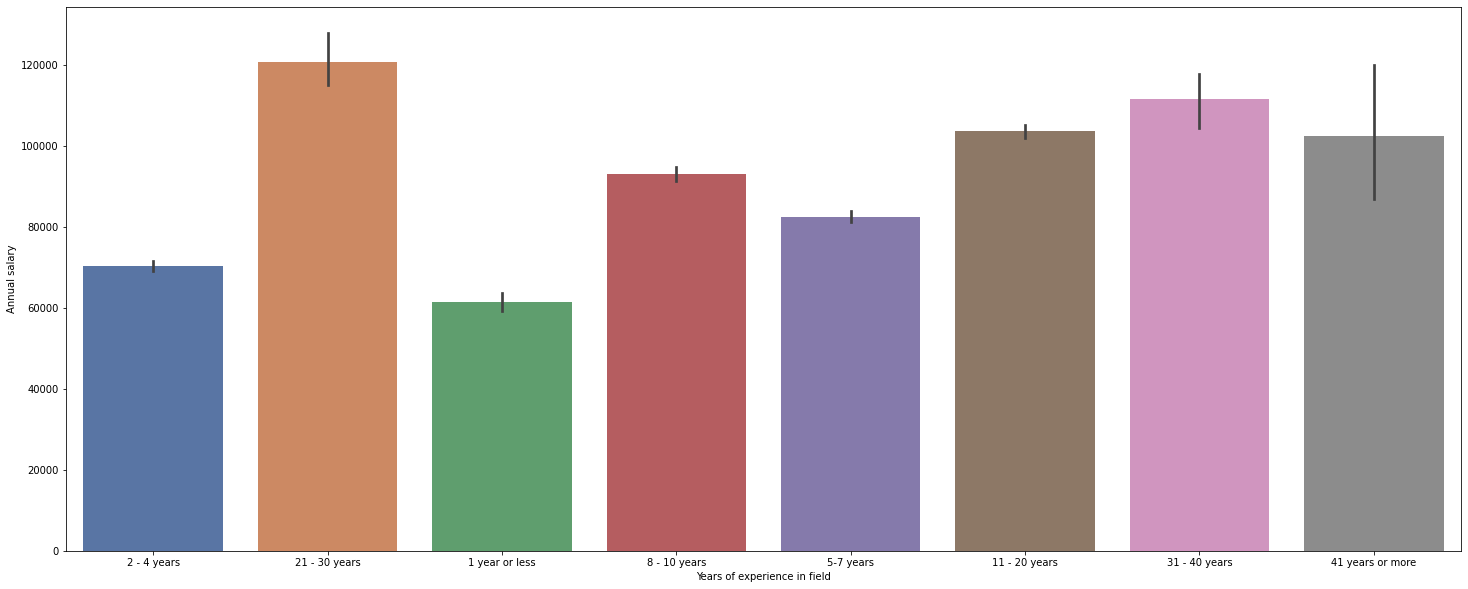

In [297]:
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Years of experience in field', y = 'Annual salary', data = salary_df, palette='deep')
plt.xticks(rotation = 0)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

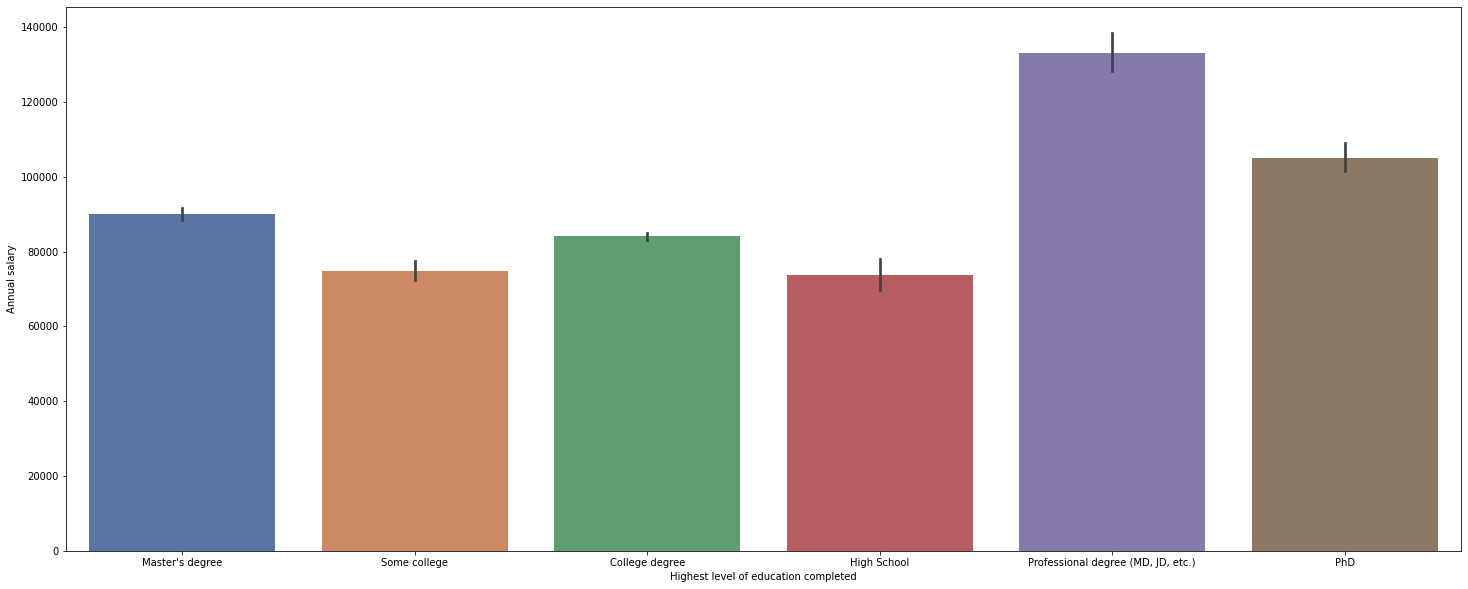

In [298]:
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Highest level of education completed', y = 'Annual salary', data = salary_df, palette='deep')
plt.xticks(rotation = 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text major ticklabel objects>)

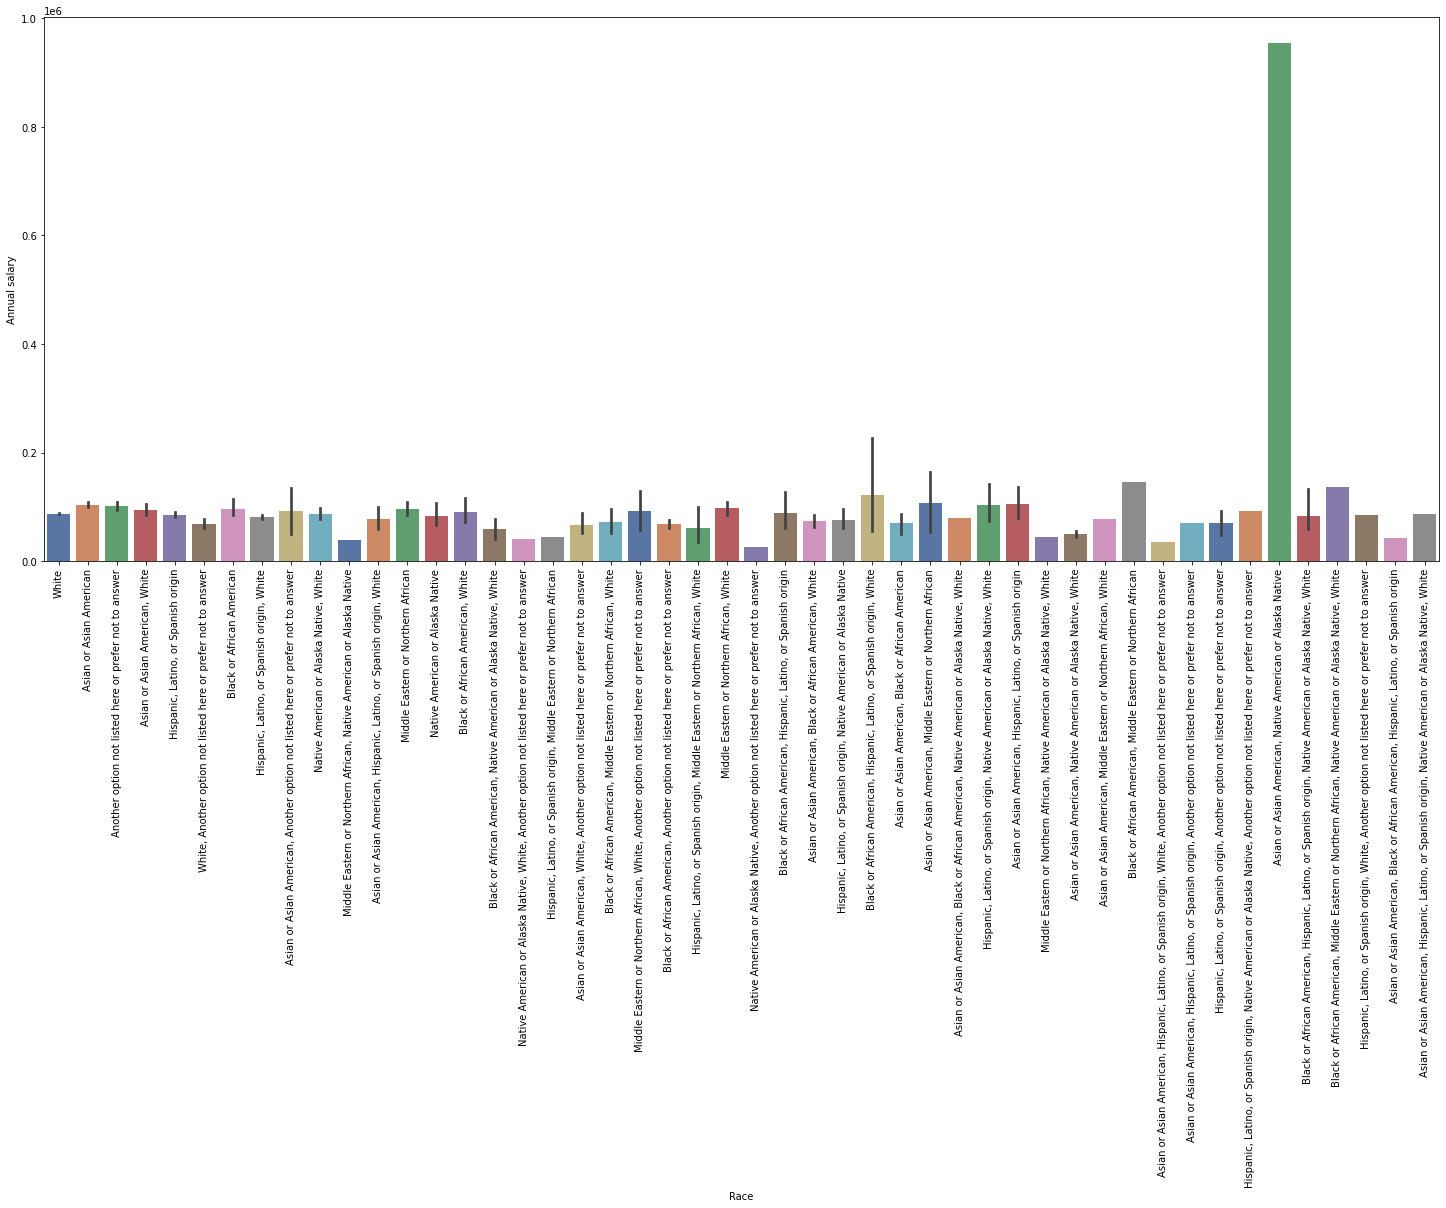

In [299]:
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Race', y = 'Annual salary', data = salary_df, palette='deep')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

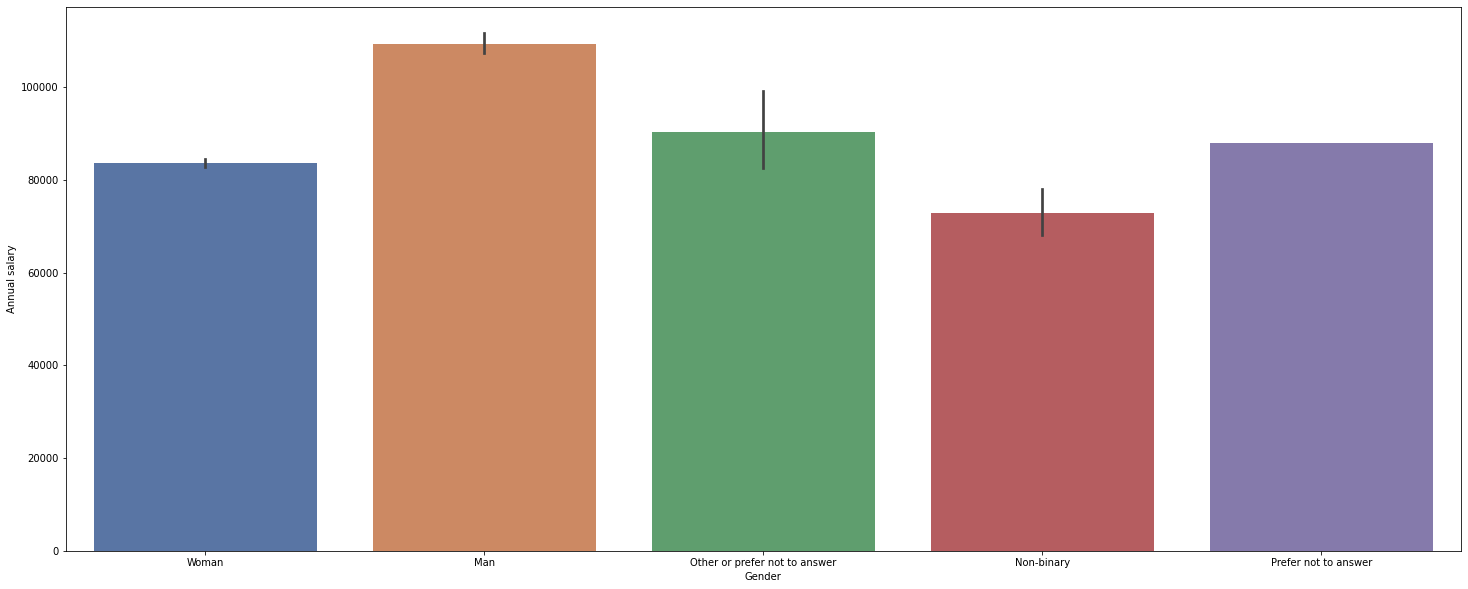

In [300]:
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Gender', y = 'Annual salary', data = salary_df, palette='deep')
plt.xticks(rotation = 0)

# **Write the cleaned version to file**

In [301]:
salary_df.to_csv('Salary Dataframe_CLEANED.csv')